In [1]:
!pip3 install gensim==3.8.3

     |████████████████████████████████| 24.2 MB 101 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [3]:
%%capture
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.996.5
!pip install unidic-lite

## 元データ

In [4]:
df_origin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kikagaku/AI長期コース/0_自走アプリ/dataset/久留米市オープンデータ_料理の栄養価一覧.csv')
df_origin.head()

,料理の種類,料理名,エネルギー[キロカロリー],たんぱく質[グラム],脂質[グラム],炭水化物[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],食塩相当量[グラム],野菜量[グラム],調理工程,材料1＿材料名,材料1＿重量[グラム],材料2＿材料名,材料2＿重量[グラム],材料3＿材料名,材料3＿重量[グラム],材料4＿材料名,材料4＿重量[グラム],材料5＿材料名,材料5＿重量[グラム],材料6＿材料名,材料6＿重量[グラム],材料7＿材料名,材料7＿重量[グラム],材料8＿材料名,材料8＿重量[グラム],材料9＿材料名,材料9＿重量[グラム],材料10＿材料名,材料10＿重量[グラム],材料11＿材料名,材料11＿重量[グラム],材料12＿材料名,材料12＿重量[グラム],材料13＿材料名,材料13＿重量[グラム],材料14＿材料名,材料14＿重量[グラム],材料15＿材料名,材料15＿重量[グラム],材料16＿材料名,材料16＿重量[グラム],材料17＿材料名,材料17＿重量[グラム],材料18＿材料名,材料18＿重量[グラム],材料19＿材料名,材料19＿重量[グラム],材料20＿材料名,材料20＿重量[グラム]
0,ごはん,ごはん（中茶碗1杯）,252,3.8,0.5,55.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,めし・精白米（水稲）,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ごはん,麦ごはん,248,4.3,0.7,54.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,米・精白米（水稲）,60,大麦・押麦,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ごはん,きのこたっぷり混ぜご飯,307,6.6,2.4,61.4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,NaN,米・精白米（水稲）,70,えのきたけ＿生,7.0,しめじ・ぶなしめじ＿生,7.0,まいたけ＿生,7.0,油揚げ,5.0,かつお・昆布だし,90.0,こいくちしょうゆ,6.0,みりん風調味料,9.0,清酒・上撰,7.5,糸みつば・葉＿生,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ごはん,五目炊き込みご飯,311,11.4,2.7,57.9,28.0,0.5,62.0,0.06,0.09,2.0,1.1,35.0,NaN,米・精白米（水稲）,66,油揚げ,5.0,にんじん・根、皮つき＿生,7.0,板こんにゃく（精粉こんにゃく）,15.0,ごぼう・根＿生,20.0,生しいたけ＿生,5.0,若鶏・むね、皮なし＿生,25.0,こいくちしょうゆ,3.0,みりん風調味料,3.0,昆布だし,50.0,食塩,0.5,清酒・上撰,1.2,さやいんげん・若ざや＿生,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ごはん,赤飯,289,6.1,1.1,63.8,18.0,0.8,0.0,0.13,0.03,0.0,0.5,0.0,NaN,赤飯（もち米製品）,150,ごま＿いり,1.0,食塩,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#■１．栄養の処理

## データの分布

(array([65., 46., 29., 25.,  6., 10.,  3.,  2.,  3.,  3.]),
 array([  3. ,  90.9, 178.8, 266.7, 354.6, 442.5, 530.4, 618.3, 706.2,
        794.1, 882. ]),
 <a list of 10 Patch objects>)

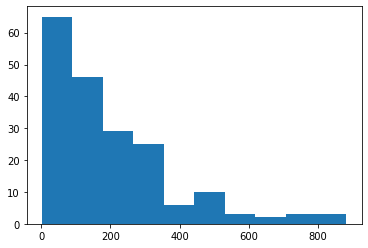

In [5]:
plt.hist(df_origin['エネルギー[キロカロリー]'], bins=10)

(array([76., 26., 19., 30., 22., 11.,  4.,  2.,  1.,  1.]),
 array([ 0.1 ,  3.95,  7.8 , 11.65, 15.5 , 19.35, 23.2 , 27.05, 30.9 ,
        34.75, 38.6 ]),
 <a list of 10 Patch objects>)

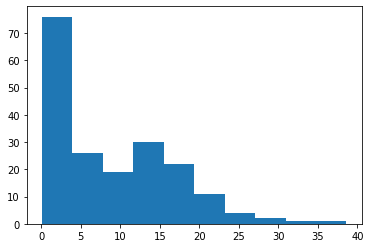

In [6]:
plt.hist(df_origin.dropna(subset=['たんぱく質[グラム]'])['たんぱく質[グラム]'], bins=10)

(array([96., 35., 24., 17.,  9.,  3.,  5.,  1.,  1.,  1.]),
 array([ 0.  ,  4.59,  9.18, 13.77, 18.36, 22.95, 27.54, 32.13, 36.72,
        41.31, 45.9 ]),
 <a list of 10 Patch objects>)

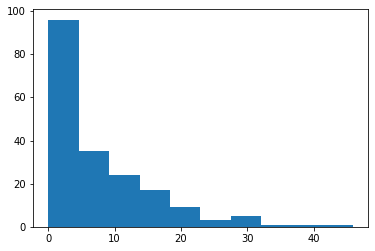

In [7]:
plt.hist(df_origin['脂質[グラム]'], bins=10)

(array([111.,  28.,  17.,   3.,   7.,  12.,   8.,   0.,   4.,   2.]),
 array([1.0000e-01, 1.2510e+01, 2.4920e+01, 3.7330e+01, 4.9740e+01,
        6.2150e+01, 7.4560e+01, 8.6970e+01, 9.9380e+01, 1.1179e+02,
        1.2420e+02]),
 <a list of 10 Patch objects>)

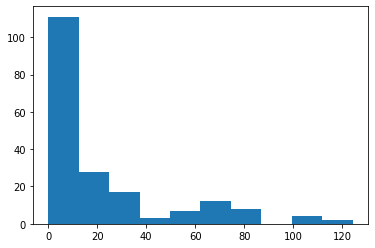

In [8]:
plt.hist(df_origin['炭水化物[グラム]'], bins=10)

(array([48., 28., 12., 10.,  3.,  2.,  2.,  5.,  0.,  2.]),
 array([  6. ,  32.4,  58.8,  85.2, 111.6, 138. , 164.4, 190.8, 217.2,
        243.6, 270. ]),
 <a list of 10 Patch objects>)

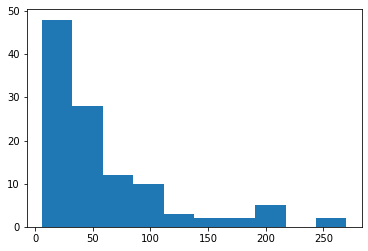

In [9]:
plt.hist(df_origin.dropna(subset=['カルシウム[mg]'])['カルシウム[mg]'], bins=10)

(array([26., 39., 17.,  8., 13.,  4.,  1.,  0.,  3.,  1.]),
 array([0.1 , 0.47, 0.84, 1.21, 1.58, 1.95, 2.32, 2.69, 3.06, 3.43, 3.8 ]),
 <a list of 10 Patch objects>)

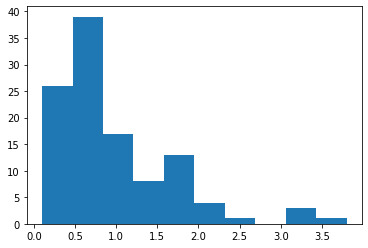

In [10]:
plt.hist(df_origin.dropna(subset=['鉄分[mg]'])['鉄分[mg]'], bins=10)

(array([67., 26.,  7.,  6.,  4.,  1.,  0.,  0.,  0.,  1.]),
 array([  0. ,  51.6, 103.2, 154.8, 206.4, 258. , 309.6, 361.2, 412.8,
        464.4, 516. ]),
 <a list of 10 Patch objects>)

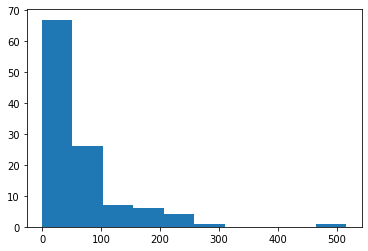

In [11]:
plt.hist(df_origin.dropna(subset=['ビタミンA[ug]'])['ビタミンA[ug]'], bins=10)

(array([44., 34., 12.,  9.,  7.,  0.,  1.,  0.,  1.,  4.]),
 array([0.01, 0.07, 0.13, 0.19, 0.25, 0.31, 0.37, 0.43, 0.49, 0.55, 0.61]),
 <a list of 10 Patch objects>)

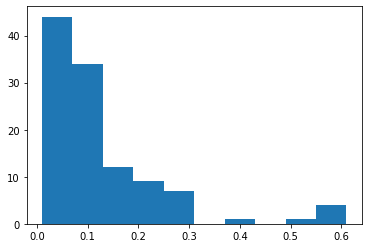

In [12]:
plt.hist(df_origin.dropna(subset=['ビタミンB1[mg]'])['ビタミンB1[mg]'], bins=10)

(array([32., 21., 20., 13.,  8.,  7.,  8.,  1.,  1.,  1.]),
 array([0.01 , 0.061, 0.112, 0.163, 0.214, 0.265, 0.316, 0.367, 0.418,
        0.469, 0.52 ]),
 <a list of 10 Patch objects>)

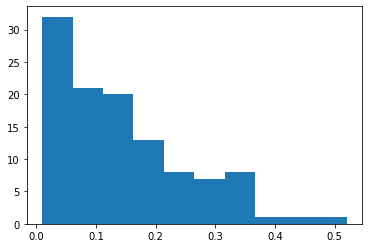

In [13]:
plt.hist(df_origin.dropna(subset=['ビタミンB2[mg]'])['ビタミンB2[mg]'], bins=10)

(array([56., 23., 16.,  6.,  4.,  3.,  2.,  1.,  0.,  1.]),
 array([ 0. ,  7.8, 15.6, 23.4, 31.2, 39. , 46.8, 54.6, 62.4, 70.2, 78. ]),
 <a list of 10 Patch objects>)

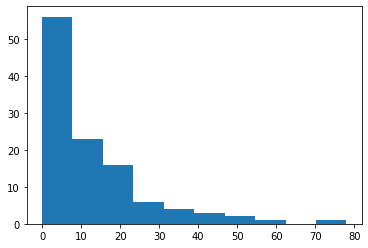

In [14]:
plt.hist(df_origin.dropna(subset=['ビタミンC[mg]'])['ビタミンC[mg]'], bins=10)

## クラスタリング

In [15]:
"""
df_ntr_fillna_zero = df_origin[['料理名', 'エネルギー[キロカロリー]', 'たんぱく質[グラム]', '炭水化物[グラム]', '脂質[グラム]', 'カルシウム[mg]', '鉄分[mg]', 'ビタミンA[ug]', 'ビタミンB1[mg]', 'ビタミンB2[mg]', 'ビタミンC[mg]']]
df_ntr_fillna_zero = df_ntr_fillna_zero.fillna({
    'エネルギー[キロカロリー]': 0,
    'たんぱく質[グラム]': 0.0,
    '炭水化物[グラム]': 0.0,
    '脂質[グラム]': 0.0,
    'カルシウム[mg]': 0.0,
    '鉄分[mg]': 0.0,
    'ビタミンA[ug]': 0,
    'ビタミンB1[mg]': 0.0,
    'ビタミンB2[mg]': 0.0,
    'ビタミンC[mg]': 0.0
})
df_ntr_fillna_zero.head()
"""

"\ndf_ntr_fillna_zero = df_origin[['料理名', 'エネルギー[キロカロリー]', 'たんぱく質[グラム]', '炭水化物[グラム]', '脂質[グラム]', 'カルシウム[mg]', '鉄分[mg]', 'ビタミンA[ug]', 'ビタミンB1[mg]', 'ビタミンB2[mg]', 'ビタミンC[mg]']]\ndf_ntr_fillna_zero = df_ntr_fillna_zero.fillna({\n    'エネルギー[キロカロリー]': 0,\n    'たんぱく質[グラム]': 0.0,\n    '炭水化物[グラム]': 0.0,\n    '脂質[グラム]': 0.0,\n    'カルシウム[mg]': 0.0,\n    '鉄分[mg]': 0.0,\n    'ビタミンA[ug]': 0,\n    'ビタミンB1[mg]': 0.0,\n    'ビタミンB2[mg]': 0.0,\n    'ビタミンC[mg]': 0.0\n})\ndf_ntr_fillna_zero.head()\n"

In [16]:
df_drop_ntr_nan = df_origin.dropna(subset=['カルシウム[mg]'])
df_drop_ntr_nan.head()

,料理の種類,料理名,エネルギー[キロカロリー],たんぱく質[グラム],脂質[グラム],炭水化物[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],食塩相当量[グラム],野菜量[グラム],調理工程,材料1＿材料名,材料1＿重量[グラム],材料2＿材料名,材料2＿重量[グラム],材料3＿材料名,材料3＿重量[グラム],材料4＿材料名,材料4＿重量[グラム],材料5＿材料名,材料5＿重量[グラム],材料6＿材料名,材料6＿重量[グラム],材料7＿材料名,材料7＿重量[グラム],材料8＿材料名,材料8＿重量[グラム],材料9＿材料名,材料9＿重量[グラム],材料10＿材料名,材料10＿重量[グラム],材料11＿材料名,材料11＿重量[グラム],材料12＿材料名,材料12＿重量[グラム],材料13＿材料名,材料13＿重量[グラム],材料14＿材料名,材料14＿重量[グラム],材料15＿材料名,材料15＿重量[グラム],材料16＿材料名,材料16＿重量[グラム],材料17＿材料名,材料17＿重量[グラム],材料18＿材料名,材料18＿重量[グラム],材料19＿材料名,材料19＿重量[グラム],材料20＿材料名,材料20＿重量[グラム]
3,ごはん,五目炊き込みご飯,311,11.4,2.7,57.9,28.0,0.5,62.0,0.06,0.09,2.0,1.1,35.0,NaN,米・精白米（水稲）,66,油揚げ,5.00,にんじん・根、皮つき＿生,7.00,板こんにゃく（精粉こんにゃく）,15.0,ごぼう・根＿生,20.0,生しいたけ＿生,5.0,若鶏・むね、皮なし＿生,25.0,こいくちしょうゆ,3.00,みりん風調味料,3.0,昆布だし,50.0,食塩,0.5,清酒・上撰,1.2,さやいんげん・若ざや＿生,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ごはん,赤飯,289,6.1,1.1,63.8,18.0,0.8,0.0,0.13,0.03,0.0,0.5,0.0,NaN,赤飯（もち米製品）,150,ごま＿いり,1.00,食塩,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ごはん,巻き寿司,402,10.2,4.3,78.2,45.0,1.0,103.0,0.09,0.22,9.0,2.4,73.4,NaN,めし・精白米（水稲）,170,清酒・上撰,3.75,穀物酢,13.00,車糖・上白糖,4.5,食塩,1.5,乾ししいたけ＿乾,2.0,車糖・上白糖,1.5,みりん風調味料,3.00,こいくちしょうゆ,3.0,鶏卵・全卵＿生,25.0,車糖・上白糖,1.5,食塩,0.2,調合油,1.0,きゅうり＿生,60.0,まだら・でんぶ,3.0,あまのり・焼きのり,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ごはん,ちらし寿司,457,13.7,4.7,86.3,95.0,1.3,516.0,0.30,0.36,2.0,3.2,42.0,NaN,めし・精白米（水稲）,200,穀物酢,20.00,車糖・上白糖,4.50,食塩,2.0,にんじん・根、皮つき＿生,15.0,食塩,0.2,車糖・上白糖,1.0,昆布だし,10.00,乾ししいたけ＿乾,2.0,かんぴょう＿乾,2.0,こいくちしょうゆ,3.0,車糖・上白糖,1.5,鶏卵・全卵＿生,28.0,食塩,0.2,調合油,1.0,くるまえび・養殖＿生,20.0,食塩,0.2,さやいんげん・若ざや＿生,5.0,NaN,NaN,NaN,NaN
8,ごはん,親子丼,665,28.5,8.9,110.7,47.0,1.7,90.0,0.15,0.37,5.0,2.1,65.0,NaN,めし・精白米（水稲）,260,若鶏・もも、皮なし＿生,75.00,清酒・上撰,3.75,たまねぎ・りん茎＿生,60.0,かつおだし,25.0,こいくちしょうゆ,12.0,みりん風調味料,9.0,車糖・上白糖,2.25,鶏卵・全卵＿生,50.0,切りみつば・葉＿生,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
x_n = df_drop_ntr_nan[['エネルギー[キロカロリー]', 'たんぱく質[グラム]', '炭水化物[グラム]', '脂質[グラム]', 'カルシウム[mg]', '鉄分[mg]', 'ビタミンA[ug]', 'ビタミンB1[mg]', 'ビタミンB2[mg]', 'ビタミンC[mg]']].values

In [18]:
# 必要なライブラリのインポート
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-darkgrid')

# データの正規化
x_n_norm = MinMaxScaler().fit_transform(x_n)

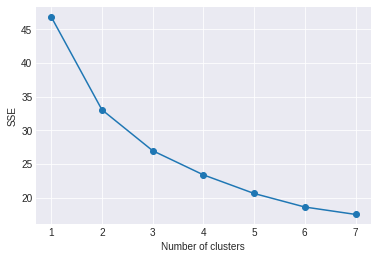

In [19]:
## エルボー法によるクラスタリングの性能評価
from sklearn.cluster import KMeans

# クラスタ内誤差平方和を格納
sse = []

for i in range(1, 8):
  # k-meansの適用
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(x_n_norm)
  # クラスタ内誤差平方和をリストに追加
  sse.append(kmeans.inertia_)

# クラスタリング結果の可視化
plt.ylabel('SSE')
plt.xlabel('Number of clusters')
plt.xticks(range(1,8))
plt.plot(range(1,8), sse, marker='o')
plt.show()

In [20]:
# モデルの作成
from sklearn.cluster import KMeans

kmeans_ntr = KMeans(n_clusters=3, random_state=0)

kmeans_ntr.fit(x_n_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
# クラスタの取得
cluster_ntr = kmeans_ntr.predict(x_n_norm)
cluster_ntr

array([2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [22]:
# 結果を代入
df_drop_ntr_nan['n_cluster'] = cluster_ntr

df_drop_ntr_nan.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,料理の種類,料理名,エネルギー[キロカロリー],たんぱく質[グラム],脂質[グラム],炭水化物[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],食塩相当量[グラム],野菜量[グラム],調理工程,材料1＿材料名,材料1＿重量[グラム],材料2＿材料名,材料2＿重量[グラム],材料3＿材料名,材料3＿重量[グラム],材料4＿材料名,材料4＿重量[グラム],材料5＿材料名,材料5＿重量[グラム],材料6＿材料名,材料6＿重量[グラム],材料7＿材料名,材料7＿重量[グラム],材料8＿材料名,材料8＿重量[グラム],材料9＿材料名,材料9＿重量[グラム],材料10＿材料名,材料10＿重量[グラム],材料11＿材料名,材料11＿重量[グラム],材料12＿材料名,材料12＿重量[グラム],材料13＿材料名,材料13＿重量[グラム],材料14＿材料名,材料14＿重量[グラム],材料15＿材料名,材料15＿重量[グラム],材料16＿材料名,材料16＿重量[グラム],材料17＿材料名,材料17＿重量[グラム],材料18＿材料名,材料18＿重量[グラム],材料19＿材料名,材料19＿重量[グラム],材料20＿材料名,材料20＿重量[グラム],n_cluster
3,ごはん,五目炊き込みご飯,311,11.4,2.7,57.9,28.0,0.5,62.0,0.06,0.09,2.0,1.1,35.0,NaN,米・精白米（水稲）,66,油揚げ,5.00,にんじん・根、皮つき＿生,7.00,板こんにゃく（精粉こんにゃく）,15.0,ごぼう・根＿生,20.0,生しいたけ＿生,5.0,若鶏・むね、皮なし＿生,25.0,こいくちしょうゆ,3.00,みりん風調味料,3.0,昆布だし,50.0,食塩,0.5,清酒・上撰,1.2,さやいんげん・若ざや＿生,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,ごはん,赤飯,289,6.1,1.1,63.8,18.0,0.8,0.0,0.13,0.03,0.0,0.5,0.0,NaN,赤飯（もち米製品）,150,ごま＿いり,1.00,食塩,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,ごはん,巻き寿司,402,10.2,4.3,78.2,45.0,1.0,103.0,0.09,0.22,9.0,2.4,73.4,NaN,めし・精白米（水稲）,170,清酒・上撰,3.75,穀物酢,13.00,車糖・上白糖,4.5,食塩,1.5,乾ししいたけ＿乾,2.0,車糖・上白糖,1.5,みりん風調味料,3.00,こいくちしょうゆ,3.0,鶏卵・全卵＿生,25.0,車糖・上白糖,1.5,食塩,0.2,調合油,1.0,きゅうり＿生,60.0,まだら・でんぶ,3.0,あまのり・焼きのり,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,ごはん,ちらし寿司,457,13.7,4.7,86.3,95.0,1.3,516.0,0.30,0.36,2.0,3.2,42.0,NaN,めし・精白米（水稲）,200,穀物酢,20.00,車糖・上白糖,4.50,食塩,2.0,にんじん・根、皮つき＿生,15.0,食塩,0.2,車糖・上白糖,1.0,昆布だし,10.00,乾ししいたけ＿乾,2.0,かんぴょう＿乾,2.0,こいくちしょうゆ,3.0,車糖・上白糖,1.5,鶏卵・全卵＿生,28.0,食塩,0.2,調合油,1.0,くるまえび・養殖＿生,20.0,食塩,0.2,さやいんげん・若ざや＿生,5.0,NaN,NaN,NaN,NaN,0
8,ごはん,親子丼,665,28.5,8.9,110.7,47.0,1.7,90.0,0.15,0.37,5.0,2.1,65.0,NaN,めし・精白米（水稲）,260,若鶏・もも、皮なし＿生,75.00,清酒・上撰,3.75,たまねぎ・りん茎＿生,60.0,かつおだし,25.0,こいくちしょうゆ,12.0,みりん風調味料,9.0,車糖・上白糖,2.25,鶏卵・全卵＿生,50.0,切りみつば・葉＿生,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [23]:
df_cluster = df_drop_ntr_nan[['料理名', 'n_cluster']]
df_cluster.head()

,料理名,n_cluster
3,五目炊き込みご飯,2
4,赤飯,1
6,巻き寿司,2
7,ちらし寿司,0
8,親子丼,0


In [24]:
df_names = df_origin[['料理名']]

df_cluster = pd.merge(df_names, df_cluster, how='left')
df_cluster = df_cluster.fillna(9.0)
df_cluster.head()

,料理名,n_cluster
0,ごはん（中茶碗1杯）,9.0
1,麦ごはん,9.0
2,きのこたっぷり混ぜご飯,9.0
3,五目炊き込みご飯,2.0
4,赤飯,1.0


### 結果の考察

In [25]:
# 空のデータフレームを作成
df_result_ntr = pd.DataFrame()

df_ntr = df_drop_ntr_nan[['エネルギー[キロカロリー]', 'たんぱく質[グラム]', '炭水化物[グラム]', '脂質[グラム]', 'カルシウム[mg]', '鉄分[mg]', 'ビタミンA[ug]', 'ビタミンB1[mg]', 'ビタミンB2[mg]', 'ビタミンC[mg]', 'n_cluster']]

df_result_ntr['cluster 0'] = df_ntr[df_ntr['n_cluster'] == 0].mean().tolist()
df_result_ntr['cluster 1'] = df_ntr[df_ntr['n_cluster'] == 1].mean().tolist()
df_result_ntr['cluster 2'] = df_ntr[df_ntr['n_cluster'] == 2].mean().tolist()

df_result_ntr

,cluster 0,cluster 1,cluster 2
0,525.307692,68.8400,244.306122
1,19.830769,2.8440,14.083673
2,67.092308,9.3420,17.593878
3,17.715385,2.4060,11.985714
4,89.076923,58.1800,52.510204
5,2.153846,0.6840,0.895918
6,126.769231,54.1800,49.816327
7,0.260769,0.0610,0.151633
8,0.298462,0.0866,0.162449
9,10.923077,12.0200,13.183673


In [26]:
# 転置
df_result_ntr = df_result_ntr.set_index(df_ntr.columns)
df_result_ntr = df_result_ntr.T
df_result_ntr

,エネルギー[キロカロリー],たんぱく質[グラム],炭水化物[グラム],脂質[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],n_cluster
cluster 0,525.307692,19.830769,67.092308,17.715385,89.076923,2.153846,126.769231,0.260769,0.298462,10.923077,0.0
cluster 1,68.840000,2.844000,9.342000,2.406000,58.180000,0.684000,54.180000,0.061000,0.086600,12.020000,1.0
cluster 2,244.306122,14.083673,17.593878,11.985714,52.510204,0.895918,49.816327,0.151633,0.162449,13.183673,2.0


### ラベル予測モデルの作成

In [27]:
# データ型の確認
type(x_n), type(x_n_norm), type(cluster_ntr)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [28]:
# データサイズの確認
x_n.shape, x_n_norm.shape, cluster_ntr.shape

((112, 10), (112, 10), (112,))

### ランダムフォレスト

In [29]:
# ハイパーパラメータチューニング
!pip install optuna

import optuna
# K-分割交差検証
from sklearn.model_selection import cross_val_score

     |████████████████████████████████| 302 kB 2.6 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 208 kB 56.2 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 111 kB 71.9 MB/s 
     |████████████████████████████████| 141 kB 64.7 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=98f1d7f6f6910e1429be235a33c58c8e62d169332af55b7f32db39a8401f173b
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
def objective(trial, x, t, cv):
    # 1. ハイパーパラメータごとに探索範囲を指定
    n_estimators = trial.suggest_int('n_estimators', 1, 20)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 'auto'])

    # 2. 学習に使用するアルゴリズムを指定
    estimator = RandomForestClassifier(
      n_estimators = n_estimators,
      criterion = criterion,
      max_depth = max_depth,
      max_features = max_features,
      random_state = 0
    )

    # 3. 学習の実行、検証結果の表示
    print('Current_params : ', trial.params)
    accuracy = cross_val_score(estimator, x, t, cv=cv).mean()
    return accuracy

In [32]:
# study オブジェクトの作成（最大化）
study_ntr = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))

[I 2021-09-04 10:15:12,834] A new study created in memory with name: no-name-4ce7873c-9a09-4aa9-9703-6dd4a6d526a7


In [33]:
# K 分割交差検証の K
cv = 5
# 目的関数の最適化
## lambdaで追加の引数（学習データ）を渡す
study_ntr.optimize(lambda trial: objective(trial, x_n, cluster_ntr, cv), n_trials=10)

print(study_ntr.best_trial)

[I 2021-09-04 10:15:12,947] Trial 0 finished with value: 0.8853754940711462 and parameters: {'n_estimators': 8, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8853754940711462.


Current_params :  {'n_estimators': 8, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'sqrt'}
Current_params :  {'n_estimators': 18, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt'}


[I 2021-09-04 10:15:13,104] Trial 1 finished with value: 0.8841897233201582 and parameters: {'n_estimators': 18, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8853754940711462.
[I 2021-09-04 10:15:13,153] Trial 2 finished with value: 0.9367588932806324 and parameters: {'n_estimators': 4, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'auto'}. Best is trial 2 with value: 0.9367588932806324.
[I 2021-09-04 10:15:13,195] Trial 3 finished with value: 0.9019762845849802 and parameters: {'n_estimators': 3, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.9367588932806324.
[I 2021-09-04 10:15:13,303] Trial 4 finished with value: 0.8758893280632412 and parameters: {'n_estimators': 12, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}. Best is trial 2 with value: 0.9367588932806324.


Current_params :  {'n_estimators': 4, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'auto'}
Current_params :  {'n_estimators': 3, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}
Current_params :  {'n_estimators': 12, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}
Current_params :  {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}


[I 2021-09-04 10:15:13,450] Trial 5 finished with value: 0.875889328063241 and parameters: {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}. Best is trial 2 with value: 0.9367588932806324.
[I 2021-09-04 10:15:13,475] Trial 6 finished with value: 0.8565217391304347 and parameters: {'n_estimators': 1, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}. Best is trial 2 with value: 0.9367588932806324.
[I 2021-09-04 10:15:13,528] Trial 7 finished with value: 0.9102766798418973 and parameters: {'n_estimators': 4, 'criterion': 'gini', 'max_depth': 29, 'max_features': 'auto'}. Best is trial 2 with value: 0.9367588932806324.
[I 2021-09-04 10:15:13,560] Trial 8 finished with value: 0.8735177865612649 and parameters: {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto'}. Best is trial 2 with value: 0.9367588932806324.
[I 2021-09-04 10:15:13,640] Trial 9 finished with value: 0.8581027667984189 and parameters: {'n_estimators':

Current_params :  {'n_estimators': 1, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}
Current_params :  {'n_estimators': 4, 'criterion': 'gini', 'max_depth': 29, 'max_features': 'auto'}
Current_params :  {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto'}
Current_params :  {'n_estimators': 8, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}
FrozenTrial(number=2, values=[0.9367588932806324], datetime_start=datetime.datetime(2021, 9, 4, 10, 15, 13, 106554), datetime_complete=datetime.datetime(2021, 9, 4, 10, 15, 13, 153048), params={'n_estimators': 4, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'auto'}, distributions={'n_estimators': IntUniformDistribution(high=20, low=1, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'max_depth': IntUniformDistribution(high=30, low=2, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', 'auto'))}, user_attrs={}, system_attrs={}, inte

In [34]:
study_ntr.best_params

{'criterion': 'entropy',
 'max_depth': 17,
 'max_features': 'auto',
 'n_estimators': 4}

#### モデルの作成

In [35]:
from sklearn.ensemble import RandomForestClassifier

model_ntr = RandomForestClassifier(n_estimators=4, max_depth=17, max_features='auto', criterion='entropy', random_state=0)
model_ntr.fit(x_n, cluster_ntr)

print('train score :', model_ntr.score(x_n, cluster_ntr))
#print('test score :', model.score(x_test, t_test))"

train score : 0.9553571428571429


In [36]:
import pickle
# モデルの保存
with open('/content/drive/MyDrive/Colab Notebooks/kikagaku/AI長期コース/0_自走アプリ/recipe_classifier_ntr.pkl', 'wb') as f:
    pickle.dump(model_ntr, f)

# ■２．材料と調理工程

In [37]:
df_ing_and_pro = df_origin.drop(['食塩相当量[グラム]', '野菜量[グラム]','エネルギー[キロカロリー]', 'たんぱく質[グラム]', '炭水化物[グラム]', '脂質[グラム]', 'カルシウム[mg]', '鉄分[mg]', 'ビタミンA[ug]', 'ビタミンB1[mg]', 'ビタミンB2[mg]', 'ビタミンC[mg]'], axis=1)
df_ing_and_pro = df_ing_and_pro.fillna({
    '調理工程': ''
})
df_ing_and_pro.head()

,料理の種類,料理名,調理工程,材料1＿材料名,材料1＿重量[グラム],材料2＿材料名,材料2＿重量[グラム],材料3＿材料名,材料3＿重量[グラム],材料4＿材料名,材料4＿重量[グラム],材料5＿材料名,材料5＿重量[グラム],材料6＿材料名,材料6＿重量[グラム],材料7＿材料名,材料7＿重量[グラム],材料8＿材料名,材料8＿重量[グラム],材料9＿材料名,材料9＿重量[グラム],材料10＿材料名,材料10＿重量[グラム],材料11＿材料名,材料11＿重量[グラム],材料12＿材料名,材料12＿重量[グラム],材料13＿材料名,材料13＿重量[グラム],材料14＿材料名,材料14＿重量[グラム],材料15＿材料名,材料15＿重量[グラム],材料16＿材料名,材料16＿重量[グラム],材料17＿材料名,材料17＿重量[グラム],材料18＿材料名,材料18＿重量[グラム],材料19＿材料名,材料19＿重量[グラム],材料20＿材料名,材料20＿重量[グラム]
0,ごはん,ごはん（中茶碗1杯）,,めし・精白米（水稲）,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ごはん,麦ごはん,,米・精白米（水稲）,60,大麦・押麦,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ごはん,きのこたっぷり混ぜご飯,,米・精白米（水稲）,70,えのきたけ＿生,7.0,しめじ・ぶなしめじ＿生,7.0,まいたけ＿生,7.0,油揚げ,5.0,かつお・昆布だし,90.0,こいくちしょうゆ,6.0,みりん風調味料,9.0,清酒・上撰,7.5,糸みつば・葉＿生,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ごはん,五目炊き込みご飯,,米・精白米（水稲）,66,油揚げ,5.0,にんじん・根、皮つき＿生,7.0,板こんにゃく（精粉こんにゃく）,15.0,ごぼう・根＿生,20.0,生しいたけ＿生,5.0,若鶏・むね、皮なし＿生,25.0,こいくちしょうゆ,3.0,みりん風調味料,3.0,昆布だし,50.0,食塩,0.5,清酒・上撰,1.2,さやいんげん・若ざや＿生,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ごはん,赤飯,,赤飯（もち米製品）,150,ごま＿いり,1.0,食塩,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# 材料
import math

ingredients_list = []
for i in range(len(df_ing_and_pro.index)):
  ingredients = []
  for j in range(1,20):
    ing_col = "材料{}＿材料名".format(j)
    qt_col = "材料{}＿重量[グラム]".format(j)

    material = df_ing_and_pro[ing_col][i]
    qt = df_ing_and_pro[qt_col][i]
    if isinstance(material, str):
      mat_qt = material + '：' +str(qt)
      ingredients.append(mat_qt)
  
  ingredients = '\n'.join(ingredients)
  ingredients_list.append(ingredients)

In [39]:
ingredients_list[:10]

['めし・精白米（水稲）：150',
 '米・精白米（水稲）：60\n大麦・押麦：10.0',
 '米・精白米（水稲）：70\nえのきたけ＿生：7.0\nしめじ・ぶなしめじ＿生：7.0\nまいたけ＿生：7.0\n油揚げ：5.0\nかつお・昆布だし：90.0\nこいくちしょうゆ：6.0\nみりん風調味料：9.0\n清酒・上撰：7.5\n糸みつば・葉＿生：2.0',
 '米・精白米（水稲）：66\n油揚げ：5.0\nにんじん・根、皮つき＿生：7.0\n板こんにゃく（精粉こんにゃく）：15.0\nごぼう・根＿生：20.0\n生しいたけ＿生：5.0\n若鶏・むね、皮なし＿生：25.0\nこいくちしょうゆ：3.0\nみりん風調味料：3.0\n昆布だし：50.0\n食塩：0.5\n清酒・上撰：1.2\nさやいんげん・若ざや＿生：3.0',
 '赤飯（もち米製品）：150\nごま＿いり：1.0\n食塩：0.5',
 'めし・精白米（水稲）：105\n清酒・上撰：3.75\n穀物酢：13.0\n車糖・上白糖：4.5\n食塩：1.5\n油揚げ：22.5\nかつお・昆布だし：20.0\n車糖・上白糖：3.7\nこいくちしょうゆ：4.2\nごま＿いり：1.0',
 'めし・精白米（水稲）：170\n清酒・上撰：3.75\n穀物酢：13.0\n車糖・上白糖：4.5\n食塩：1.5\n乾ししいたけ＿乾：2.0\n車糖・上白糖：1.5\nみりん風調味料：3.0\nこいくちしょうゆ：3.0\n鶏卵・全卵＿生：25.0\n車糖・上白糖：1.5\n食塩：0.2\n調合油：1.0\nきゅうり＿生：60.0\nまだら・でんぶ：3.0\nあまのり・焼きのり：2.0',
 'めし・精白米（水稲）：200\n穀物酢：20.0\n車糖・上白糖：4.5\n食塩：2.0\nにんじん・根、皮つき＿生：15.0\n食塩：0.2\n車糖・上白糖：1.0\n昆布だし：10.0\n乾ししいたけ＿乾：2.0\nかんぴょう＿乾：2.0\nこいくちしょうゆ：3.0\n車糖・上白糖：1.5\n鶏卵・全卵＿生：28.0\n食塩：0.2\n調合油：1.0\nくるまえび・養殖＿生：20.0\n食塩：0.2\nさやいんげん・若ざや＿生：5.0',
 'めし・精白米（水稲）：260\n若鶏・もも、皮なし＿生：75.0\n清酒・上撰：3.75\

In [40]:
import re

def preprocessing(texts1, texts2):
    processed_txts = []
    for i in range(len(texts1)):
      text = texts1[i] + texts2[i]
      text = text.replace('\n', '') # 改行コードを削除
      text = re.sub('[・（）()：.0-9a-zA-Z]', '', text)
      processed_txts.append(text)
    return processed_txts

In [41]:
texts1 = list(ingredients_list)
texts2 = list(df_ing_and_pro['調理工程'])

processed_txts = preprocessing(texts1, texts2)
processed_txts[30:40]

['うどん＿ゆでかつお昆布だしこいくちしょうゆみりん本みりん根深ねぎ葉、軟白＿生油揚げかつお昆布だし車糖上白糖こいくちしょうゆ油揚げを半分に切る。小さめのフライパンに水 、醤油みりん砂糖 各大さじ１と油揚げを加える。煮立ったら、片面１分半～２分ずつ煮る。そのまま置いておく。冷凍うどんをで５分加熱する。鍋に水 、醤油 大さじ１、めんつゆ 大さじ１、砂糖 小さじ２、ほんだし 小さじ１を入れひと煮立ちさせる。器に加熱したうどんを加え、つゆを注ぐ。きつねとお好みで刻みネギかまぼこをトッピングする。',
 'うどん＿ゆでかつお昆布だしこいくちしょうゆみりん本みりん根深ねぎ葉、軟白＿生和牛かた脂身つき＿生たまねぎりん茎＿生かつお昆布だし清酒上撰こいくちしょうゆ車糖上白糖みりん本みりん生姜は皮を剥き、千切りにしておくフライパンにサラダ油をひき中火に熱し、生姜を炒める香りが立ったら牛こま切れ肉を加え、炒めます。色が変わってきたらを加え、肉に火が通ったら火から下ろす鍋につゆの材料を加え混ぜ合わせ、中火にかけ沸騰させる。うどんを入れ、パッケージの表記通りにゆでる器に盛り付け、をのせ、小ねぎを散らす',
 'うどん＿ゆでかつお昆布だしこいくちしょうゆみりん本みりん根深ねぎ葉、軟白＿生やまのいもいちょういも＿生長芋はすりおろす耐熱ボウルにうどんを入れ、ふんわりラップをかけて、パッケージの表記通りに電子レンジで加熱し、解凍する鍋に水、を入れ、中火にかけてひと煮立ちさせ、火から下ろすを盛り付けた器に、を注ぎ入れ、、青のりをのせる',
 'うどん＿ゆでかつお昆布だしこいくちしょうゆみりん本みりん根深ねぎ葉、軟白＿生鶏卵全卵＿生',
 'うどん＿ゆでかつお昆布だしこいくちしょうゆみりん本みりん根深ねぎ葉、軟白＿生ブラックタイガー養殖＿生食塩薄力粉等鶏卵全卵＿生調合油',
 'うどん＿ゆでかつお昆布だしこいくちしょうゆみりん本みりん根深ねぎ葉、軟白＿生ごぼう根＿生食塩薄力粉等鶏卵全卵＿生調合油',
 'そば＿ゆでかつお昆布だしこいくちしょうゆみりん本みりん根深ねぎ葉、軟白＿生',
 'そば＿ゆで根深ねぎ葉、軟白＿生あまのり焼きのりめんつゆストレート',
 'そば＿ゆでかつお昆布だしこいくちしょうゆみりん本みりん根深ねぎ葉、軟白＿生湯通し塩蔵わかめ＿塩抜き',
 'そば＿ゆでかつお昆布だしこいくちしょ

In [42]:
import MeCab
def keitaiso(text):
  tagger = MeCab.Tagger("-Ochasen")
  tagger.parse("")
  node = tagger.parseToNode(text)
  word = ""
  pre_feature = ""
  while node:
         # 名詞、形容詞、動詞、形容動詞であるかを判定する。
    HANTEI = "名詞" in node.feature
    HANTEI = "形容詞" in node.feature or HANTEI
    HANTEI = "動詞" in node.feature or HANTEI
    HANTEI = "形容動詞" in node.feature or HANTEI
         # 以下に該当する場合は除外する。（ストップワード）
    HANTEI = (not "代名詞" in node.feature) and HANTEI
    HANTEI = (not "助動詞" in node.feature) and HANTEI
    HANTEI = (not "非自立" in node.feature) and HANTEI
    HANTEI = (not "数" in node.feature) and HANTEI
    HANTEI = (not "人名" in node.feature) and HANTEI
    if HANTEI:
      if ("名詞接続" in pre_feature and "名詞" in node.feature) or ("接尾" in node.feature):
        word += "{0}".format(node.surface)
      else:
        word += " {0}".format(node.surface)
      #print("{0}{1}".format(node.surface, node.feature))
    pre_feature = node.feature
    node = node.next
  return word[1:]

In [43]:
texts_nva = [keitaiso(text) for text in processed_txts]
texts_nva[30:40]

['うどん ゆで かつお 昆布 こい くちし ょうゆみりん 本みりん 根深 ねぎ 葉 軟白 生油揚げ かつお 昆布 だし車糖 上白糖 こい くち しょうゆ 油揚げ 半分 切る 小さめ フライパン 水 醤油 みりん 砂糖 各大さじ 油揚げ 加える 煮立っ 片面 ～ 煮る 置い 冷凍 うどん で 加熱 する 鍋 水 醤油 大さじ めん つゆ 大さじ 砂糖 小さじ ほん 小さじ 入れ ひと煮立ち させる 器 加熱 し うどん 加え つゆ 注ぐ きつね お好み 刻み ネギ かまぼこ トッピング する',
 'うどん ゆで かつお 昆布 こい くちし ょうゆみりん 本みりん 根深 ねぎ 葉 軟白 生和牛かた 脂身つき 生たまねぎ 茎 生かつお 昆布 清酒上 撰 こい くち しょうゆ車糖 上白糖 みりん 本みりん 生姜 皮 剥き 千切り し フライパン サラダ油 ひき 中火 熱し 生姜 炒める 香り 立っ 牛 こま切れ 肉 加え 炒め 色 変わっ 加え 肉 火 通っ 火 下ろす 鍋 つゆ 材料 加え 混ぜ合わせ 中火 沸騰 させる うどん 入れ パッケージ 表記通り ゆでる 器 盛り付け のせ 小ねぎ 散らす',
 'うどん ゆで かつお 昆布 こい くちし ょうゆみりん 本みりん 根深 ねぎ 葉 軟白生 いも いちょう いも 生長芋 すり おろす 耐熱 ボウル うどん 入れ ラップ かけ パッケージ 表記通り 電子 レンジ 加熱 し 解凍 する 鍋 水 入れ 中火 ひと煮立ち させ 火 下ろす 盛り付け 器 注ぎ 入れ 青のり のせる',
 'うどん ゆで かつお 昆布 こい くちし ょうゆみりん 本みりん 根深 ねぎ 葉 軟白 生鶏卵 全卵生',
 'うどん ゆで かつお 昆布 こい くちし ょうゆみりん 本みりん 根深 ねぎ 葉 軟白 生ブラック タイガー 養殖 生食 塩 薄力粉等 鶏卵 全卵 生調合油',
 'うどん ゆで かつお 昆布 こい くちし ょうゆみりん 本みりん 根深 ねぎ 葉 軟白 生ごぼう 根 生食 塩 薄力粉等 鶏卵 全卵 生調合油',
 'そば ゆで かつお 昆布 こい くちし ょうゆみりん 本みりん 根深 ねぎ 葉 軟白生',
 'そば ゆで 根深 ねぎ 葉 軟白 生あま のり焼き のり めん つゆ ストレート',
 'そば ゆで かつお 昆布 こ

In [44]:
# 文書ごとに単語を分割してリストにする。
trainings = [TaggedDocument(words = data.split(),tags = [i]) for i,data in enumerate(texts_nva)]

In [45]:
trainings[30:40]

[TaggedDocument(words=['うどん', 'ゆで', 'かつお', '昆布', 'こい', 'くちし', 'ょうゆみりん', '本みりん', '根深', 'ねぎ', '葉', '軟白', '生油揚げ', 'かつお', '昆布', 'だし車糖', '上白糖', 'こい', 'くち', 'しょうゆ', '油揚げ', '半分', '切る', '小さめ', 'フライパン', '水', '醤油', 'みりん', '砂糖', '各大さじ', '油揚げ', '加える', '煮立っ', '片面', '～', '煮る', '置い', '冷凍', 'うどん', 'で', '加熱', 'する', '鍋', '水', '醤油', '大さじ', 'めん', 'つゆ', '大さじ', '砂糖', '小さじ', 'ほん', '小さじ', '入れ', 'ひと煮立ち', 'させる', '器', '加熱', 'し', 'うどん', '加え', 'つゆ', '注ぐ', 'きつね', 'お好み', '刻み', 'ネギ', 'かまぼこ', 'トッピング', 'する'], tags=[30]),
 TaggedDocument(words=['うどん', 'ゆで', 'かつお', '昆布', 'こい', 'くちし', 'ょうゆみりん', '本みりん', '根深', 'ねぎ', '葉', '軟白', '生和牛かた', '脂身つき', '生たまねぎ', '茎', '生かつお', '昆布', '清酒上', '撰', 'こい', 'くち', 'しょうゆ車糖', '上白糖', 'みりん', '本みりん', '生姜', '皮', '剥き', '千切り', 'し', 'フライパン', 'サラダ油', 'ひき', '中火', '熱し', '生姜', '炒める', '香り', '立っ', '牛', 'こま切れ', '肉', '加え', '炒め', '色', '変わっ', '加え', '肉', '火', '通っ', '火', '下ろす', '鍋', 'つゆ', '材料', '加え', '混ぜ合わせ', '中火', '沸騰', 'させる', 'うどん', '入れ', 'パッケージ', '表記通り', 'ゆでる', '器', '盛り付け', 'のせ', '小ねぎ', '散らす'], tags=[31]),
 Tag

In [46]:
# モデルの学習
m = Doc2Vec(documents= trainings, dm = 1, size=300, window=8, min_count=10, workers=4)

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:319: UserWarning:

The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.



In [47]:
# モデルの保存
m.save("/content/drive/MyDrive/Colab Notebooks/kikagaku/AI長期コース/0_自走アプリ/ip_doc2vec.model")

## クラスタリング

### k-means

In [48]:
#ベクトルをリストに格納
vectors_list=[m.docvecs[n] for n in range(len(m.docvecs))]

In [49]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(vectors_list)

In [50]:
# PCAで次元削減
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)

x_std_transformed = pca.fit_transform(x_scaled)

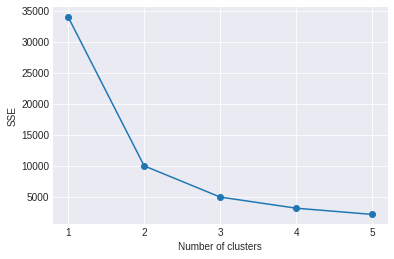

In [51]:
## エルボー法によるクラスタリングの性能評価
from sklearn.cluster import KMeans

# クラスタ内誤差平方和を格納
sse = []

for i in range(1, 6):
  # k-meansの適用
  kmeans = KMeans(n_clusters=i, random_state=0)
  #kmeans.fit(vectors_list)
  kmeans.fit(x_std_transformed)
  
  # クラスタ内誤差平方和をリストに追加
  sse.append(kmeans.inertia_)

# クラスタリング結果の可視化
plt.ylabel('SSE')
plt.xlabel('Number of clusters')
plt.xticks(range(1,6))
plt.plot(range(1,6), sse, marker='o')
plt.show()

In [52]:
# モデルの作成
from sklearn.cluster import KMeans

kmeans_ip = KMeans(n_clusters=3, random_state=0)

# kmeans_ip.fit(X.toarray())
kmeans_ip.fit(x_std_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [53]:
# クラスタの取得
#cluster_ip = kmeans_ip.predict(X.toarray())
cluster_ip = kmeans_ip.predict(x_std_transformed)

In [54]:
cluster_ip

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [55]:
df_processed = df_origin[['料理名', 'エネルギー[キロカロリー]', 'たんぱく質[グラム]', '炭水化物[グラム]', '脂質[グラム]', 'カルシウム[mg]', '鉄分[mg]', 'ビタミンA[ug]', 'ビタミンB1[mg]', 'ビタミンB2[mg]', 'ビタミンC[mg]', '調理工程']]
df_processed['材料'] = ingredients_list
df_processed['n_cluster'] = df_cluster['n_cluster']
df_processed['ip_cluster'] = cluster_ip
df_processed.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,料理名,エネルギー[キロカロリー],たんぱく質[グラム],炭水化物[グラム],脂質[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],調理工程,材料,n_cluster,ip_cluster
0,ごはん（中茶碗1杯）,252,3.8,55.7,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,めし・精白米（水稲）：150,9.0,0
1,麦ごはん,248,4.3,54.0,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,米・精白米（水稲）：60\n大麦・押麦：10.0,9.0,0
2,きのこたっぷり混ぜご飯,307,6.6,61.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,米・精白米（水稲）：70\nえのきたけ＿生：7.0\nしめじ・ぶなしめじ＿生：7.0\nまい...,9.0,0
3,五目炊き込みご飯,311,11.4,57.9,2.7,28.0,0.5,62.0,0.06,0.09,2.0,NaN,米・精白米（水稲）：66\n油揚げ：5.0\nにんじん・根、皮つき＿生：7.0\n板こんにゃ...,2.0,2
4,赤飯,289,6.1,63.8,1.1,18.0,0.8,0.0,0.13,0.03,0.0,NaN,赤飯（もち米製品）：150\nごま＿いり：1.0\n食塩：0.5,1.0,0


### 結果の考察

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'After')

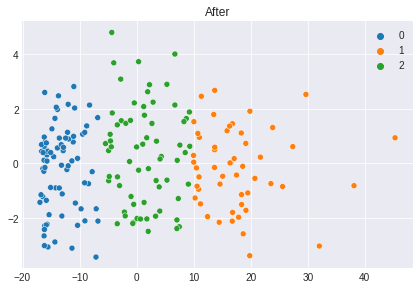

In [56]:
# 可視化
fig = plt.figure(figsize=(7,10))

ax2 = fig.add_subplot(2, 1, 2)
sns.scatterplot(x_std_transformed[:, 0], x_std_transformed[:, 1],
               hue=cluster_ip, palette=sns.color_palette(n_colors=3))
ax2.set_title('After')

### ラベル予測モデルの作成

In [57]:
# 学習データ
x_train = np.array(vectors_list)
t_train = cluster_ip

In [58]:
x_train.shape, t_train.shape

((192, 300), (192,))

### ランダムフォレスト

In [59]:
# ハイパーパラメータチューニング
!pip install optuna

import optuna
# K-分割交差検証
from sklearn.model_selection import cross_val_score

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
def objective(trial, x, t, cv):
    # 1. ハイパーパラメータごとに探索範囲を指定
    n_estimators = trial.suggest_int('n_estimators', 1, 20)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 'auto'])

    # 2. 学習に使用するアルゴリズムを指定
    estimator = RandomForestClassifier(
      n_estimators = n_estimators,
      criterion = criterion,
      max_depth = max_depth,
      max_features = max_features,
      random_state = 0
    )

    # 3. 学習の実行、検証結果の表示
    print('Current_params : ', trial.params)
    accuracy = cross_val_score(estimator, x, t, cv=cv).mean()
    return accuracy

In [62]:
# study オブジェクトの作成（最大化）
study_ip = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))

[I 2021-09-04 10:15:18,909] A new study created in memory with name: no-name-e8f9ced6-1dfb-4644-8567-1530e079c4a3


In [63]:
# K 分割交差検証の K
cv = 5
# 目的関数の最適化
## lambdaで追加の引数（学習データ）を渡す
study_ip.optimize(lambda trial: objective(trial, x_train, t_train, cv), n_trials=10)

print(study_ip.best_trial)

[I 2021-09-04 10:15:19,031] Trial 0 finished with value: 0.9380566801619434 and parameters: {'n_estimators': 8, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9380566801619434.


Current_params :  {'n_estimators': 8, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'sqrt'}
Current_params :  {'n_estimators': 18, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt'}


[I 2021-09-04 10:15:19,254] Trial 1 finished with value: 0.9481781376518219 and parameters: {'n_estimators': 18, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9481781376518219.
[I 2021-09-04 10:15:19,320] Trial 2 finished with value: 0.8962213225371121 and parameters: {'n_estimators': 4, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'auto'}. Best is trial 1 with value: 0.9481781376518219.
[I 2021-09-04 10:15:19,381] Trial 3 finished with value: 0.9017543859649122 and parameters: {'n_estimators': 3, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9481781376518219.


Current_params :  {'n_estimators': 4, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 'auto'}
Current_params :  {'n_estimators': 3, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt'}
Current_params :  {'n_estimators': 12, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}


[I 2021-09-04 10:15:19,556] Trial 4 finished with value: 0.9481781376518219 and parameters: {'n_estimators': 12, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}. Best is trial 1 with value: 0.9481781376518219.
[I 2021-09-04 10:15:19,753] Trial 5 finished with value: 0.9638326585695006 and parameters: {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}. Best is trial 5 with value: 0.9638326585695006.


Current_params :  {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}
Current_params :  {'n_estimators': 1, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}


[I 2021-09-04 10:15:19,790] Trial 6 finished with value: 0.8755735492577598 and parameters: {'n_estimators': 1, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}. Best is trial 5 with value: 0.9638326585695006.
[I 2021-09-04 10:15:19,862] Trial 7 finished with value: 0.9120107962213225 and parameters: {'n_estimators': 4, 'criterion': 'gini', 'max_depth': 29, 'max_features': 'auto'}. Best is trial 5 with value: 0.9638326585695006.
[I 2021-09-04 10:15:19,897] Trial 8 finished with value: 0.8912280701754387 and parameters: {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto'}. Best is trial 5 with value: 0.9638326585695006.


Current_params :  {'n_estimators': 4, 'criterion': 'gini', 'max_depth': 29, 'max_features': 'auto'}
Current_params :  {'n_estimators': 2, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto'}
Current_params :  {'n_estimators': 8, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}


[I 2021-09-04 10:15:20,034] Trial 9 finished with value: 0.9117408906882591 and parameters: {'n_estimators': 8, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}. Best is trial 5 with value: 0.9638326585695006.


FrozenTrial(number=5, values=[0.9638326585695006], datetime_start=datetime.datetime(2021, 9, 4, 10, 15, 19, 558044), datetime_complete=datetime.datetime(2021, 9, 4, 10, 15, 19, 753533), params={'n_estimators': 17, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto'}, distributions={'n_estimators': IntUniformDistribution(high=20, low=1, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'max_depth': IntUniformDistribution(high=30, low=2, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', 'auto'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=5, state=TrialState.COMPLETE, value=None)


In [64]:
study_ip.best_params

{'criterion': 'gini',
 'max_depth': 21,
 'max_features': 'auto',
 'n_estimators': 17}

### モデルの作成

In [65]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=4, max_depth=17, max_features='auto', criterion='entropy', random_state=0)
model.fit(x_train, t_train)

print('train score :', model.score(x_train, t_train))
#print('test score :', model.score(x_test, t_test))"

train score : 1.0


In [66]:
import pickle
# モデルの保存
with open('/content/drive/MyDrive/Colab Notebooks/kikagaku/AI長期コース/0_自走アプリ/recipe_classifier_ip.pkl', 'wb') as f:
    pickle.dump(model, f)

## 類似度上位の料理

In [67]:
df_processed.head()

,料理名,エネルギー[キロカロリー],たんぱく質[グラム],炭水化物[グラム],脂質[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],調理工程,材料,n_cluster,ip_cluster
0,ごはん（中茶碗1杯）,252,3.8,55.7,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,めし・精白米（水稲）：150,9.0,0
1,麦ごはん,248,4.3,54.0,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,米・精白米（水稲）：60\n大麦・押麦：10.0,9.0,0
2,きのこたっぷり混ぜご飯,307,6.6,61.4,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,米・精白米（水稲）：70\nえのきたけ＿生：7.0\nしめじ・ぶなしめじ＿生：7.0\nまい...,9.0,0
3,五目炊き込みご飯,311,11.4,57.9,2.7,28.0,0.5,62.0,0.06,0.09,2.0,NaN,米・精白米（水稲）：66\n油揚げ：5.0\nにんじん・根、皮つき＿生：7.0\n板こんにゃ...,2.0,2
4,赤飯,289,6.1,63.8,1.1,18.0,0.8,0.0,0.13,0.03,0.0,NaN,赤飯（もち米製品）：150\nごま＿いり：1.0\n食塩：0.5,1.0,0


In [68]:
df_processed = df_processed.fillna('')
df_processed.head()

,料理名,エネルギー[キロカロリー],たんぱく質[グラム],炭水化物[グラム],脂質[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],調理工程,材料,n_cluster,ip_cluster
0,ごはん（中茶碗1杯）,252,3.8,55.7,0.5,,,,,,,,めし・精白米（水稲）：150,9.0,0
1,麦ごはん,248,4.3,54.0,0.7,,,,,,,,米・精白米（水稲）：60\n大麦・押麦：10.0,9.0,0
2,きのこたっぷり混ぜご飯,307,6.6,61.4,2.4,,,,,,,,米・精白米（水稲）：70\nえのきたけ＿生：7.0\nしめじ・ぶなしめじ＿生：7.0\nまい...,9.0,0
3,五目炊き込みご飯,311,11.4,57.9,2.7,28,0.5,62,0.06,0.09,2,,米・精白米（水稲）：66\n油揚げ：5.0\nにんじん・根、皮つき＿生：7.0\n板こんにゃ...,2.0,2
4,赤飯,289,6.1,63.8,1.1,18,0.8,0,0.13,0.03,0,,赤飯（もち米製品）：150\nごま＿いり：1.0\n食塩：0.5,1.0,0


### コサイン類似度

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
# 関数：栄養
def recipe_cs_top3_ntr(df):

  cos_sims_top3_ntr_all = []
  for i in range(df.shape[0]):
    if df.iloc[i, 5] == '':
      cos_sims_top3_ntr_all.append('')
    else:
      cos_sims_ntr = {}
      for j in range(df.shape[0]):
        if i == j:
          continue
        elif df.iloc[j, 5] == '':
          continue
        else:        
          cs_ntr = round(float(cosine_similarity(df.iloc[i, 1:10].values.reshape(1, -1), df.iloc[j, 1:10].values.reshape(1, -1))), 3)
          cos_sims_ntr[j] = cs_ntr

      cos_sims_top3_ntr = sorted(cos_sims_ntr.items(), key=lambda x:x[1], reverse=True)[:3]
      top3_idx_ntr = [df['料理名'][k[0]] for k in cos_sims_top3_ntr]

      cos_sims_top3_ntr_all.append(top3_idx_ntr)

  return cos_sims_top3_ntr_all

In [71]:
cos_sims_top3_ntr_all = recipe_cs_top3_ntr(df_processed)
cos_sims_top3_ntr_all[:10]

['',
 '',
 '',
 ['巻き寿司', '親子丼', '炒飯'],
 ['きな粉もち（1個）', 'えび天うどん（えび天1尾）', '肉そば'],
 '',
 ['五目炊き込みご飯', '炒飯', '筑前煮'],
 ['かぼちゃの煮物', '焼魚の野菜あんかけ', 'ゆで卵（塩）'],
 ['炒飯', 'ざるそば', '五目炊き込みご飯'],
 '']

In [72]:
# 関数：材料・工程
def recipe_cs_top3_ip(df, data):

  cos_sims_top3_ip_all = []
  for i in range(df.shape[0]):
    cos_sims_ip = {}
    for j in range(df.shape[0]):
      if i == j:
        continue
      else:
        #cs_ip = round(float(cosine_similarity(tfidf_maxrix[i].reshape(1, -1), tfidf_maxrix[j].reshape(1, -1))), 3)
        cs_ip = round(float(cosine_similarity(data[i].reshape(1, -1), data[j].reshape(1, -1))), 3)

        cos_sims_ip[j] = cs_ip

    cos_sims_top3_ip = sorted(cos_sims_ip.items(), key=lambda x:x[1], reverse=True)[:3]
    top3_idx_ip = [df['料理名'][k[0]] for k in cos_sims_top3_ip]

    cos_sims_top3_ip_all.append(top3_idx_ip)

  return cos_sims_top3_ip_all

In [73]:
cos_sims_top3_ip_all = recipe_cs_top3_ip(df_processed, vectors_list)

In [74]:
cos_sims_top3_ip_all[30:40]

[['豚汁', 'かぼちゃのポタージュ', 'ポテトコロッケ'],
 ['豚汁', 'ポテトコロッケ', 'かぼちゃのポタージュ'],
 ['クリームシチュー', '豚汁', 'すきやき'],
 ['カキフライ（4個）', 'クリームシチュー', '大根きんぴら'],
 ['豚汁', '麻婆豆腐', '若竹煮'],
 ['肉野菜炒め', '麻婆豆腐', 'ビーフシチュー'],
 ['筑前煮', '若竹煮', '豆腐とえのきとわかめのすまし汁'],
 ['茶碗蒸し', '蓮根ハンバーグ', '豆腐ハンバーグ＿ジャポネソース'],
 ['ビーフシチュー', '春キャベツの具沢山ミルクスープ', 'ポテトコロッケ'],
 ['豚汁', '麻婆豆腐', '鶏の甘酢あんかけ']]

In [75]:
df_processed['似ている料理_栄養'] = cos_sims_top3_ntr_all
df_processed['似ている料理_材料・工程'] = cos_sims_top3_ip_all

In [76]:
df_processed.head()

,料理名,エネルギー[キロカロリー],たんぱく質[グラム],炭水化物[グラム],脂質[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],調理工程,材料,n_cluster,ip_cluster,似ている料理_栄養,似ている料理_材料・工程
0,ごはん（中茶碗1杯）,252,3.8,55.7,0.5,,,,,,,,めし・精白米（水稲）：150,9.0,0,,"[たまごの袋煮, チキンカツ（ソース付き）, 焼き茄子]"
1,麦ごはん,248,4.3,54.0,0.7,,,,,,,,米・精白米（水稲）：60\n大麦・押麦：10.0,9.0,0,,"[カツ丼, タコの刺身（5切）（醤油付き）, 鶏むね肉の味噌ダレ焼き]"
2,きのこたっぷり混ぜご飯,307,6.6,61.4,2.4,,,,,,,,米・精白米（水稲）：70\nえのきたけ＿生：7.0\nしめじ・ぶなしめじ＿生：7.0\nまい...,9.0,0,,"[肉野菜炒め, ポテトコロッケ, オニオンスープ]"
3,五目炊き込みご飯,311,11.4,57.9,2.7,28,0.5,62,0.06,0.09,2,,米・精白米（水稲）：66\n油揚げ：5.0\nにんじん・根、皮つき＿生：7.0\n板こんにゃ...,2.0,2,"[巻き寿司, 親子丼, 炒飯]","[クリームシチュー, かぼちゃのポタージュ, 豚汁]"
4,赤飯,289,6.1,63.8,1.1,18,0.8,0,0.13,0.03,0,,赤飯（もち米製品）：150\nごま＿いり：1.0\n食塩：0.5,1.0,0,"[きな粉もち（1個）, えび天うどん（えび天1尾）, 肉そば]","[鶏もも肉の照り焼き, もやしと油揚げのみそ汁, にら玉スープ]"


In [79]:
# 関数：栄養上おすすめの組み合わせ
proper_energy = 2700 / 3
proper_protein = 65 / 3
proper_calcium = 750 / 3
proper_iron = 7.5 / 3
proper_vitamin_a = 900 / 3
proper_vitamin_b1 = 1.4 / 3
proper_vitamin_b2 = 1.6 / 3
proper_vitamin_c = 100 / 3

def recipe_cs_top_recommend(df):

  cos_sims_top_recommend_all = []
  for i in range(df.shape[0]):
    if df.iloc[i, 5] == '':
      cos_sims_top_recommend_all.append('')
    else:

      recommend_ntr_vec = [
                  proper_energy - df.iloc[i, 1],
                  proper_protein - df.iloc[i, 2],
                  proper_calcium - df.iloc[i, 5],
                  proper_iron - df.iloc[i, 6],
                  proper_vitamin_a - df.iloc[i, 7],
                  proper_vitamin_b1 - df.iloc[i, 8],
                  proper_vitamin_b2 - df.iloc[i, 9],
                  proper_vitamin_c - df.iloc[i, 10]
      ] 

      cos_sims_recommend = {}
      for j in range(df.shape[0]):
        if i == j:
          continue
        elif df.iloc[j, 5] == '':
          continue
        else:
          ntr_vec = [
                     df.iloc[j, 1],
                     df.iloc[j, 2],
                     df.iloc[j, 5],
                     df.iloc[j, 6],
                     df.iloc[j, 7],
                     df.iloc[j, 8],
                     df.iloc[j, 9],
                     df.iloc[j, 10]
          ]

          cs_recommend = round(float(cosine_similarity(np.array(recommend_ntr_vec).reshape(1, -1), np.array(ntr_vec).reshape(1, -1))), 3)
          cos_sims_recommend[j] = cs_recommend

      #cos_sims_top3_recommend = sorted(cos_sims_recommend.items(), key=lambda x:x[1], reverse=True)[:3]
      #top3_idx_recommend = [df['料理名'][k[0]] for k in cos_sims_top3_recommend]

      top_recommend = sorted(cos_sims_recommend.items(), key=lambda x:x[1], reverse=True)[0]
      top_recommend_name = df['料理名'][top_recommend[0]]

      cos_sims_top_recommend_all.append(top_recommend_name)

  return cos_sims_top_recommend_all

In [80]:
cos_sims_top_recommend_all = recipe_cs_top_recommend(df_processed)

In [81]:
df_processed['おすすめの組み合わせ'] = cos_sims_top_recommend_all
df_processed.head()

,料理名,エネルギー[キロカロリー],たんぱく質[グラム],炭水化物[グラム],脂質[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],調理工程,材料,n_cluster,ip_cluster,似ている料理_栄養,似ている料理_材料・工程,おすすめの組み合わせ
0,ごはん（中茶碗1杯）,252,3.8,55.7,0.5,,,,,,,,めし・精白米（水稲）：150,9.0,0,,"[たまごの袋煮, チキンカツ（ソース付き）, 焼き茄子]",
1,麦ごはん,248,4.3,54.0,0.7,,,,,,,,米・精白米（水稲）：60\n大麦・押麦：10.0,9.0,0,,"[カツ丼, タコの刺身（5切）（醤油付き）, 鶏むね肉の味噌ダレ焼き]",
2,きのこたっぷり混ぜご飯,307,6.6,61.4,2.4,,,,,,,,米・精白米（水稲）：70\nえのきたけ＿生：7.0\nしめじ・ぶなしめじ＿生：7.0\nまい...,9.0,0,,"[肉野菜炒め, ポテトコロッケ, オニオンスープ]",
3,五目炊き込みご飯,311,11.4,57.9,2.7,28,0.5,62,0.06,0.09,2,,米・精白米（水稲）：66\n油揚げ：5.0\nにんじん・根、皮つき＿生：7.0\n板こんにゃ...,2.0,2,"[巻き寿司, 親子丼, 炒飯]","[クリームシチュー, かぼちゃのポタージュ, 豚汁]",フレンチトースト（食パン6枚切り1枚）
4,赤飯,289,6.1,63.8,1.1,18,0.8,0,0.13,0.03,0,,赤飯（もち米製品）：150\nごま＿いり：1.0\n食塩：0.5,1.0,0,"[きな粉もち（1個）, えび天うどん（えび天1尾）, 肉そば]","[鶏もも肉の照り焼き, もやしと油揚げのみそ汁, にら玉スープ]",クリームシチュー


In [82]:
df_processed = df_processed.reindex(columns=['料理名', 'エネルギー[キロカロリー]', '炭水化物[グラム]', 'たんぱく質[グラム]', '脂質[グラム]', 'カルシウム[mg]', '鉄分[mg]', 'ビタミンA[ug]', 'ビタミンB1[mg]', 'ビタミンB2[mg]', 'ビタミンC[mg]', '材料', '調理工程', 'n_cluster', 'ip_cluster', '似ている料理_栄養', '似ている料理_材料・工程', 'おすすめの組み合わせ'])

In [83]:
df_processed.head()

,料理名,エネルギー[キロカロリー],炭水化物[グラム],たんぱく質[グラム],脂質[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],材料,調理工程,n_cluster,ip_cluster,似ている料理_栄養,似ている料理_材料・工程,おすすめの組み合わせ
0,ごはん（中茶碗1杯）,252,55.7,3.8,0.5,,,,,,,めし・精白米（水稲）：150,,9.0,0,,"[たまごの袋煮, チキンカツ（ソース付き）, 焼き茄子]",
1,麦ごはん,248,54.0,4.3,0.7,,,,,,,米・精白米（水稲）：60\n大麦・押麦：10.0,,9.0,0,,"[カツ丼, タコの刺身（5切）（醤油付き）, 鶏むね肉の味噌ダレ焼き]",
2,きのこたっぷり混ぜご飯,307,61.4,6.6,2.4,,,,,,,米・精白米（水稲）：70\nえのきたけ＿生：7.0\nしめじ・ぶなしめじ＿生：7.0\nまい...,,9.0,0,,"[肉野菜炒め, ポテトコロッケ, オニオンスープ]",
3,五目炊き込みご飯,311,57.9,11.4,2.7,28,0.5,62,0.06,0.09,2,米・精白米（水稲）：66\n油揚げ：5.0\nにんじん・根、皮つき＿生：7.0\n板こんにゃ...,,2.0,2,"[巻き寿司, 親子丼, 炒飯]","[クリームシチュー, かぼちゃのポタージュ, 豚汁]",フレンチトースト（食パン6枚切り1枚）
4,赤飯,289,63.8,6.1,1.1,18,0.8,0,0.13,0.03,0,赤飯（もち米製品）：150\nごま＿いり：1.0\n食塩：0.5,,1.0,0,"[きな粉もち（1個）, えび天うどん（えび天1尾）, 肉そば]","[鶏もも肉の照り焼き, もやしと油揚げのみそ汁, にら玉スープ]",クリームシチュー


In [84]:
df_processed['カルシウム[mg]'] = df_processed['カルシウム[mg]'].replace(r'^\s*$', 0.0, regex=True)
df_processed['鉄分[mg]'] = df_processed['鉄分[mg]'].replace(r'^\s*$', 0.0, regex=True)
df_processed['ビタミンA[ug]'] = df_processed['ビタミンA[ug]'].replace(r'^\s*$', 0.0, regex=True)
df_processed['ビタミンB1[mg]'] = df_processed['ビタミンB1[mg]'].replace(r'^\s*$', 0.0, regex=True)
df_processed['ビタミンB2[mg]'] = df_processed['ビタミンB2[mg]'].replace(r'^\s*$', 0.0, regex=True)
df_processed['ビタミンC[mg]'] = df_processed['ビタミンC[mg]'].replace(r'^\s*$', 0.0, regex=True)

#df_processed['カルシウム[mg]'] = df_processed['カルシウム[mg]'].replace(r'^\s*$', np.nan, regex=True)
#df_processed['鉄分[mg]'] = df_processed['鉄分[mg]'].replace(r'^\s*$', np.nan, regex=True)
#df_processed['ビタミンA[ug]'] = df_processed['ビタミンA[ug]'].replace(r'^\s*$', np.nan, regex=True)
#df_processed['ビタミンB1[mg]'] = df_processed['ビタミンB1[mg]'].replace(r'^\s*$', np.nan, regex=True)
#df_processed['ビタミンB2[mg]'] = df_processed['ビタミンB2[mg]'].replace(r'^\s*$', np.nan, regex=True)
#df_processed['ビタミンC[mg]'] = df_processed['ビタミンC[mg]'].replace(r'^\s*$', np.nan, regex=True)

df_processed.head()

,料理名,エネルギー[キロカロリー],炭水化物[グラム],たんぱく質[グラム],脂質[グラム],カルシウム[mg],鉄分[mg],ビタミンA[ug],ビタミンB1[mg],ビタミンB2[mg],ビタミンC[mg],材料,調理工程,n_cluster,ip_cluster,似ている料理_栄養,似ている料理_材料・工程,おすすめの組み合わせ
0,ごはん（中茶碗1杯）,252,55.7,3.8,0.5,0.0,0.0,0.0,0.00,0.00,0.0,めし・精白米（水稲）：150,,9.0,0,,"[たまごの袋煮, チキンカツ（ソース付き）, 焼き茄子]",
1,麦ごはん,248,54.0,4.3,0.7,0.0,0.0,0.0,0.00,0.00,0.0,米・精白米（水稲）：60\n大麦・押麦：10.0,,9.0,0,,"[カツ丼, タコの刺身（5切）（醤油付き）, 鶏むね肉の味噌ダレ焼き]",
2,きのこたっぷり混ぜご飯,307,61.4,6.6,2.4,0.0,0.0,0.0,0.00,0.00,0.0,米・精白米（水稲）：70\nえのきたけ＿生：7.0\nしめじ・ぶなしめじ＿生：7.0\nまい...,,9.0,0,,"[肉野菜炒め, ポテトコロッケ, オニオンスープ]",
3,五目炊き込みご飯,311,57.9,11.4,2.7,28.0,0.5,62.0,0.06,0.09,2.0,米・精白米（水稲）：66\n油揚げ：5.0\nにんじん・根、皮つき＿生：7.0\n板こんにゃ...,,2.0,2,"[巻き寿司, 親子丼, 炒飯]","[クリームシチュー, かぼちゃのポタージュ, 豚汁]",フレンチトースト（食パン6枚切り1枚）
4,赤飯,289,63.8,6.1,1.1,18.0,0.8,0.0,0.13,0.03,0.0,赤飯（もち米製品）：150\nごま＿いり：1.0\n食塩：0.5,,1.0,0,"[きな粉もち（1個）, えび天うどん（えび天1尾）, 肉そば]","[鶏もも肉の照り焼き, もやしと油揚げのみそ汁, にら玉スープ]",クリームシチュー


In [85]:
df_processed.to_csv("/content/drive/MyDrive/Colab Notebooks/kikagaku/AI長期コース/0_自走アプリ/dataset/ProcessedMasterData_From_OpenData.csv", index=False)

In [ ]:
"""
  if request.method == 'POST':
    age_range = request.POST.get('age_range')
    gender = request.POST.get('gender')

    obj_ntr = obj.values_list('protein', 'fat', 'calcium', 'iron', 'vitamin_a', 'vitamin_b1', 'vitamin_b2', 'vitamin_c')
    ntr_list = [float(obj_ntr[0][i]) for i in range(8)]
    tgt_dri = DietaryReferenceIntake.objects.filter(age_range=age_range, gender=gender).order_by('id').reverse().values_list('protein', 'fat', 'calcium', 'iron', 'vitamin_a', 'vitamin_b1', 'vitamin_b2', 'vitamin_c')
    tgt_dri_per_meal = [float(tgt_dri[0][i]) / 3 for i in range(8)]

    necessary_ntr = []
    for i, dri in enumerate(tgt_dri_per_meal):
      if dri - ntr_list[i] > 0:
        necessary_ntr.append(dri - ntr_list[i])
      else:
        necessary_ntr.append(float(0))
"""